In [1]:
import pandas as pd
import glob

In [2]:
df = pd.read_excel("070820 interview and return volatility.xlsx")
df

,VideoFileName,ampm,permno,interview_id,intdate2,avgf0,retvol
0,42,PM,88266,20183849,2017-08-07,184.639747,0.035031
1,44,PM,60206,20183847,2017-08-07,148.134150,0.012645
2,45,PM,78916,20183848,2017-08-07,180.525479,0.014790
3,46,AM,92102,20183850,2017-08-07,176.557791,0.031966
4,52,PM,80204,20183844,2017-08-03,175.669596,0.017629
...,...,...,...,...,...,...,...
787,1802,AM,89154,20183094,2015-03-10,145.457257,0.014578
788,1803,AM,89258,20183095,2015-03-10,162.018574,0.014701
789,1804,AM,89258,20183095,2015-03-10,171.355971,0.014701
790,1805,AM,89258,20183095,2015-03-10,163.022474,0.014701


In [3]:
part = df[['avgf0','retvol']]
part

,avgf0,retvol
0,184.639747,0.035031
1,148.134150,0.012645
2,180.525479,0.014790
3,176.557791,0.031966
4,175.669596,0.017629
...,...,...
787,145.457257,0.014578
788,162.018574,0.014701
789,171.355971,0.014701
790,163.022474,0.014701


In [77]:
part.dropna()

,avgf0,retvol
0,184.639747,0.035031
1,148.134150,0.012645
2,180.525479,0.014790
3,176.557791,0.031966
4,175.669596,0.017629
...,...,...
787,145.457257,0.014578
788,162.018574,0.014701
789,171.355971,0.014701
790,163.022474,0.014701


In [5]:
part.corr(method='pearson')

,avgf0,retvol
avgf0,1.000000,-0.214712
retvol,-0.214712,1.000000


In [29]:
total = part.corr(method='pearson').values[0][1]
total

-0.21471219519597223

In [10]:
am = df.loc[df['ampm']=='AM'][['avgf0','retvol']]
pm = df.loc[df['ampm']=='PM'][['avgf0','retvol']]

In [30]:
am_value = am.corr(method='pearson').values[0][1]
am_value

-0.22117393236016275

In [31]:
pm_value = pm.corr(method='pearson').values[0][1]
pm_value

-0.15886125610617025

In [22]:
am.dropna()

,avgf0,retvol
3,176.557791,0.031966
8,158.065625,0.015162
12,145.038114,0.015503
13,217.472921,0.013078
19,157.971175,0.015263
...,...,...
787,145.457257,0.014578
788,162.018574,0.014701
789,171.355971,0.014701
790,163.022474,0.014701


In [19]:
pm.dropna()

,avgf0,retvol
0,184.639747,0.035031
1,148.134150,0.012645
2,180.525479,0.014790
4,175.669596,0.017629
5,163.940798,0.012536
...,...,...
709,178.057501,0.015318
716,160.221295,0.021699
722,172.524378,0.016962
772,162.558214,0.012850


In [49]:
s = pd.DataFrame({'corr':[am_value, pm_value]})
s.index = ['am', 'pm']

-0.22117393236016275 (-0.25, -0.22117393236016275)
-0.15886125610617025 (0.0, -0.15886125610617025)


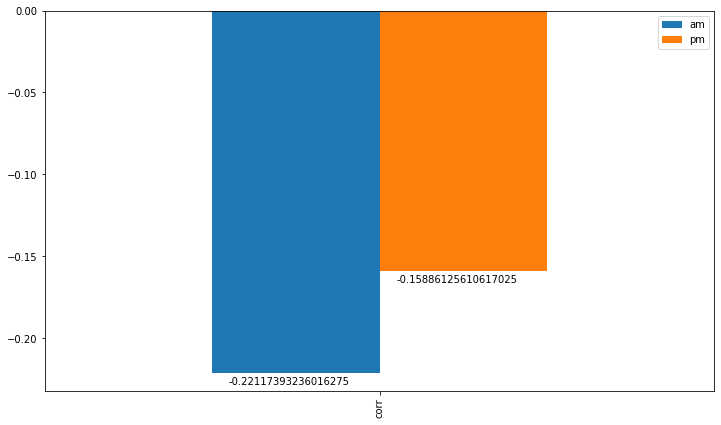

In [76]:
ax = s.T.plot(kind='bar', figsize = (12, 7), legend = True)
for p in ax.patches:
    print(str(p.get_height()), (p.get_x(), p.get_height()))
    ax.annotate("{}".format(str(p.get_height())), (p.get_x()+0.025, p.get_height()-0.007))